In [ ]:
import xarray as xr

In [ ]:

import zarr
from fsspec.implementations.http import HTTPFileSystem
fs = HTTPFileSystem()

In [ ]:
# %%
# http_map = fs.get_mapper("https://eerie.cloud.dkrz.de/datasets/icon-esm-er.eerie-control-1950.ocean.gr025.2d_monthly_mean/zarr")
http_map = fs.get_mapper("https://eerie.cloud.dkrz.de/datasets/icon-esm-er.eerie-control-1950.ocean.native.2d_daily_mean/zarr")
# open as a zarr group
zg = zarr.open_consolidated(http_map, mode="r")
ds = xr.open_zarr(http_map, consolidated=True)
ds

In [ ]:
# %%
# http_map = fs.get_mapper("https://eerie.cloud.dkrz.de/datasets/icon-esm-er.eerie-control-1950.ocean.gr025.2d_monthly_mean/zarr")
http_map = fs.get_mapper("https://eerie.cloud.dkrz.de/datasets/icon-esm-er.eerie-control-1950.ocean.native.2d_grid/zarr")
# open as a zarr group
zg      = zarr.open_consolidated(http_map, mode="r")
ds_grid = xr.open_zarr(http_map, consolidated=True)
ds_grid

<xarray.Dataset>
Dimensions:                         (nc: 2, edge: 22375924, vertex: 7487687,
                                     cell: 14886338,
                                     max_stored_decompositions: 4, ne: 6,
                                     no: 4, nv: 3, max_chdom: 1, cell_grf: 14,
                                     edge_grf: 24, vert_grf: 13, two_grf: 2)
Coordinates:
    cell_sea_land_mask              (cell) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
    clat                            (cell) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
    clon                            (cell) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
    elat                            (edge) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
    elon                            (edge) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
    vlat                            (vertex) float64 dask.array<chunksize=(7487687,), meta=np.ndarray>
    vlon                            (vertex) float64 dask.array<chunksize=(7487687,), meta=np.ndarray>
Dimensions without coordinates: nc, edge, vertex, cell,
                                max_stored_decompositions, ne, no, nv,
                                max_chdom, cell_grf, edge_grf, vert_grf, two_grf
Data variables: (12/90)
    adjacent_cell_of_edge           (nc, edge) float64 dask.array<chunksize=(1, 12499998), meta=np.ndarray>
    cartesian_x_vertices            (vertex) float64 dask.array<chunksize=(7487687,), meta=np.ndarray>
    cartesian_y_vertices            (vertex) float64 dask.array<chunksize=(7487687,), meta=np.ndarray>
    cartesian_z_vertices            (vertex) float64 dask.array<chunksize=(7487687,), meta=np.ndarray>
    cell_area                       (cell) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
    cell_area_p                     (cell) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
    ...                              ...
    vertex_of_cell                  (nv, cell) float64 dask.array<chunksize=(1, 12499998), meta=np.ndarray>
    vertices_of_vertex              (ne, vertex) float64 dask.array<chunksize=(3, 4166665), meta=np.ndarray>
    vlat_vertices                   (vertex, ne) float64 dask.array<chunksize=(4166665, 3), meta=np.ndarray>
    vlon_vertices                   (vertex, ne) float64 dask.array<chunksize=(4166665, 3), meta=np.ndarray>
    zonal_normal_dual_edge          (edge) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
    zonal_normal_primal_edge        (edge) float64 dask.array<chunksize=(12500000,), meta=np.ndarray>
Attributes: (12/45)
    ICON_grid_file_uri:       http://icon-downloads.mpimet.mpg.de/grids/publi...
    NCO:                      netCDF Operators version 4.7.5 (Homepage = http...
    boundary_depth_index:     0
    centre:                   252
    coverage:                 ocean only
    crs_id:                   urn:ogc:def:cs:EPSG:6.0:6422
    ...                       ...
    title:                    ICON grid description
    topography:               modified SRTM30
    user_name:                Rene Redler (m300083)
    uuidOfHGrid:              375cb0cc-637e-11e8-9d6f-8f41a9b9ff4b
    ppurl:                    https://eerie.cloud.dkrz.de/static/ICON/erc1011...
    _catalog_id:              icon-esm-er.eerie-control-1950.ocean.native.2d_...

### alternative data load

In [ ]:
import intake
eerie_cat=intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")
eerie_cat
# %%
eerie_dkrz=eerie_cat["dkrz"]
eerie_dkrz_disk=eerie_dkrz["disk"]
cat=eerie_dkrz_disk["model-output"]

# %%
ds = cat["icon-esm-er.eerie-control-1950.ocean.native.2d_daily_mean"].to_dask()
# %%
ds_grid = cat["icon-esm-er.eerie-control-1950.ocean.native.2d_grid"].to_dask()

### load data from download

In [ ]:
path_2_data = '/Users/mepke/python/tapgfd/data/swift.dkrz.de/tapgfd_workshop/'
ds_tgrid    = xr.open_dataset(f'{path_2_data}icon-esm-er.eerie-control-1950.ocean.native.2d_grid_minimal.nc')
ds          = xr.open_dataset(f'{path_2_data}icon-esm-er.eerie-control-1950.ocean.native.2d_daily_mean_snapshot.nc')


In [ ]:
ds

<xarray.Dataset> Size: 893MB
Dimensions:                              (ncells: 14886338, depth: 1, lev: 1)
Coordinates:
  * depth                                (depth) float64 8B 1.0
    lat                                  (ncells) float64 119MB ...
  * lev                                  (lev) float64 8B 0.0
    lon                                  (ncells) float64 119MB ...
    time                                 datetime64[ns] 8B ...
Dimensions without coordinates: ncells
Data variables:
    Wind_Speed_10m                       (ncells) float32 60MB ...
    atmos_fluxes_FrshFlux_Evaporation    (ncells) float32 60MB ...
    atmos_fluxes_FrshFlux_Precipitation  (ncells) float32 60MB ...
    cell_sea_land_mask                   (ncells) int32 60MB ...
    mlotst10                             (ncells) float32 60MB ...
    sea_level_pressure                   (ncells) float32 60MB ...
    so                                   (depth, ncells) float32 60MB ...
    ssh                                  (ncells) float32 60MB ...
    to                                   (depth, ncells) float32 60MB ...
    u                                    (depth, ncells) float32 60MB ...
    v                                    (depth, ncells) float32 60MB ...
Attributes: (12/34)
    CDI:                      Climate Data Interface version 2.2.0 (https://m...
    Conventions:              CF-1.6
    DOKU_License:             CC BY 4.0
    DOKU_Name:                EERIE ICON-ESM-ER eerie-control-1950 run
    DOKU_authors:             Putrasahan, D.; Kröger, J.; Wachsmann, F.
    DOKU_responsible_person:  Fabian Wachsmann
    ...                       ...
    source_type:              AOGCM
    time_max:                 28401119
    time_min:                 27351359
    time_reduction:           mean
    title:                    ICON simulation
    uuidOfHGrid:              375cb0cc-637e-11e8-9d6f-8f41a9b9ff4b

In [ ]:
# ds_sel = ds.to.isel(time=1000).drop('cell_sea_land_mask').squeeze()
ds_sel = ds.to.squeeze()
ds_sel = ds_sel.rename({"lon": "clon", "lat": "clat"})
ds_sel

<xarray.DataArray 'to' (ncells: 14886338)> Size: 60MB
[14886338 values with dtype=float32]
Coordinates:
    depth    float64 8B 1.0
    clat     (ncells) float64 119MB ...
    clon     (ncells) float64 119MB ...
    time     datetime64[ns] 8B ...
Dimensions without coordinates: ncells
Attributes:
    CDI_grid_type:                unstructured
    code:                         2
    long_name:                    sea water potential temperature
    number_of_grid_in_reference:  1
    standard_name:                sea_water_potential_temperature
    units:                        deg C

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
projection = ccrs.PlateCarree()
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

In [ ]:

def calc_triangulation_obj(data, ds_grid, lon_reg, lat_reg):
    """create triangulation object for highres plot
    Example:
    pyic.shade(Tri, data_reg...)
    Todo: make it a full xarray calculation
    """ 
    print('Deriving triangulation object, this can take a while...')
    clon = np.rad2deg(ds_grid.clon.values)
    clat = np.rad2deg(ds_grid.clat.values)
    vlon = np.rad2deg(ds_grid.vlon.values)
    vlat = np.rad2deg(ds_grid.vlat.values)
    # vertex_of_cell = ds_grid.vertex_of_cell.drop('cell_sea_land_mask').values.transpose()-1
    vertex_of_cell = ds_grid.vertex_of_cell.values.transpose()-1

    ind_reg = np.where(   (clon >  lon_reg[0])
                        & (clon <= lon_reg[1])
                        & (clat >  lat_reg[0])
                        & (clat <= lat_reg[1]) )[0]
    vertex_of_cell_reg = vertex_of_cell[ind_reg,:]
    Tri = matplotlib.tri.Triangulation(vlon, vlat, triangles=vertex_of_cell_reg)
    data_reg = data.compute().data[ind_reg]
    print('Done deriving triangulation object.')
    return Tri, data_reg
# %%



In [86]:

def plot_triangles(Tri, data_reg, cmap, clim, string):
    plt.figure()
    ax = plt.axes(projection=projection)
    cb = ax.tripcolor(Tri, data_reg, shading='flat', cmap=cmap, vmin=clim[0], vmax=clim[1], rasterized=True, transform=projection)
    plt.colorbar(cb, orientation = 'horizontal', label=f'{string}')
    ax.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=6)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, zorder=7)
    plt.xlim(lon_reg)
    plt.ylim(lat_reg)
    ax.set_xticks(np.arange(lon_reg[0], lon_reg[1], 4), crs=projection)
    ax.set_yticks(np.arange(lat_reg[0], lat_reg[1], 4), crs=projection)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # type: ignore
    ax.yaxis.set_major_locator(plt.MaxNLocator(5)) # type: ignore
    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

In [82]:
lon_reg = [40, 179]
lat_reg = [-20, 30]
Tri, data_reg = calc_triangulation_obj(ds_sel, ds_tgrid, lon_reg, lat_reg)

Deriving triangulation object, this can take a while...
Done deriving triangulation object.


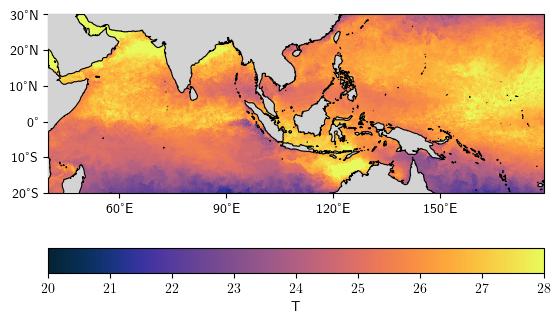

In [87]:
clim = 20,28
cmap = cmocean.cm.thermal
plot_triangles(Tri, data_reg, cmap, clim, string=r'T')

In [88]:
lon_reg = [60, 80]
lat_reg = [0, 10]
Tri, data_reg = calc_triangulation_obj(ds_sel, ds_tgrid, lon_reg, lat_reg)

Deriving triangulation object, this can take a while...
Done deriving triangulation object.


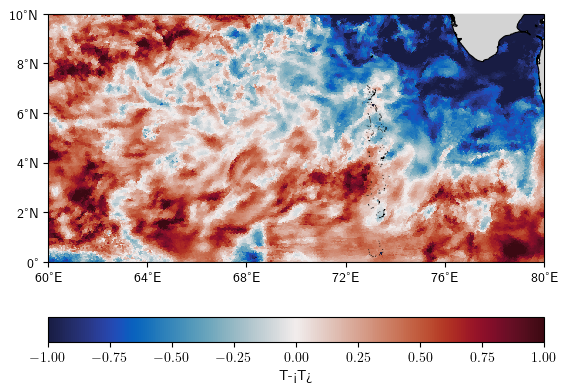

In [89]:
#plot on triangulars
clim = -1,1 
cmap = cmocean.cm.balance
plot_triangles(Tri, (data_reg-data_reg.mean()), cmap, clim, string=r'T-<T>')

In [90]:
lon_reg = [70, 80]
lat_reg = [5, 10]
Tri, data_reg = calc_triangulation_obj(ds_sel, ds_tgrid, lon_reg, lat_reg)

Deriving triangulation object, this can take a while...
Done deriving triangulation object.


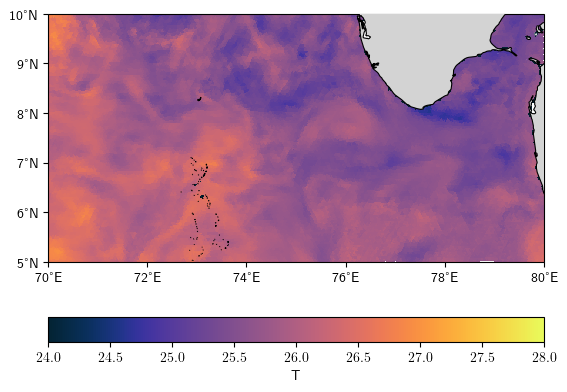

In [91]:
clim = 24,28
cmap = cmocean.cm.thermal
plot_triangles(Tri, data_reg, cmap, clim, string=r'T')

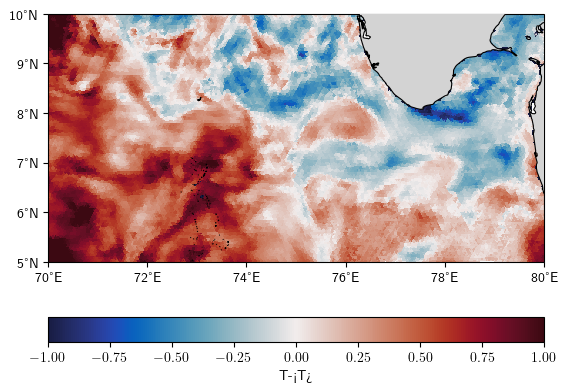

In [93]:
clim = -1,1
cmap = cmocean.cm.balance
plot_triangles(Tri, (data_reg-data_reg.mean()), cmap, clim, string=r'T-<T>')
